### Importando Libs

In [4]:

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import os, json, cv2, random
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from IPython.display import Image
from base64 import b64decode
from matplotlib import pyplot as plt
import matplotlib

## Detecção com Imagem

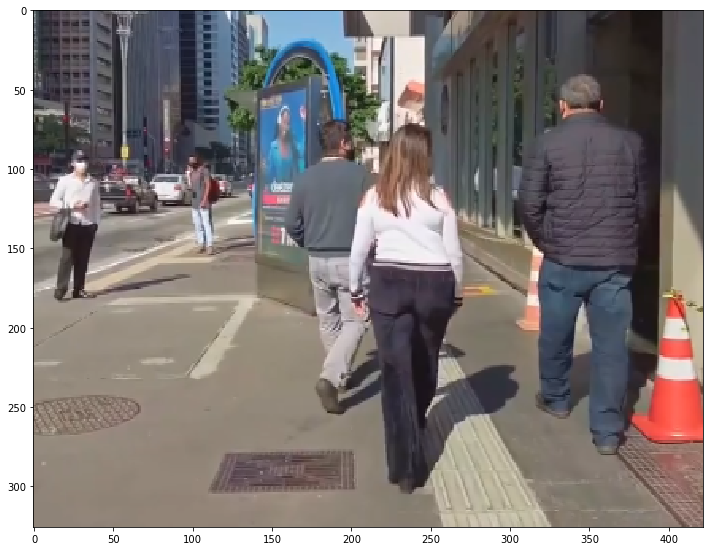

In [36]:
im = cv2.imread("./images/frame_example.png")
# cv2.imshow('Imagem', im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
dpi = matplotlib.rcParams['figure.dpi']
height, width, depth = im.shape

plt.figure(figsize = (12,12))
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [37]:
cfg = get_cfg()
cfg.MODEL.DEVICE = 'cpu'
cfg.IMAGE = 0
cfg.SEGMENTATION = 1
cfg.IMAGE_BW = 2
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

### Retorno de Segmentações

In [38]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0,  0,  2,  2,  2, 26, 26,  0])
Boxes(tensor([[304.6222,  40.1722, 386.6615, 280.9142],
        [  9.9539,  90.3469,  42.9587, 181.9429],
        [195.6217,  72.0884, 274.7528, 304.6999],
        [158.8582,  68.3018, 219.5490, 251.4310],
        [ 97.4134,  90.6406, 118.1058, 154.1968],
        [ 72.6743, 103.5145,  97.7883, 124.0068],
        [112.5072, 104.0611, 126.1212, 119.0454],
        [ 41.8538, 104.1066,  80.1266, 128.6901],
        [ 10.6585, 124.3351,  23.9467, 146.3806],
        [ 10.3002, 107.6865,  27.8090, 146.9231],
        [145.9342,  60.7246, 168.7892, 109.5223]]))


### Visualização da Segmentação

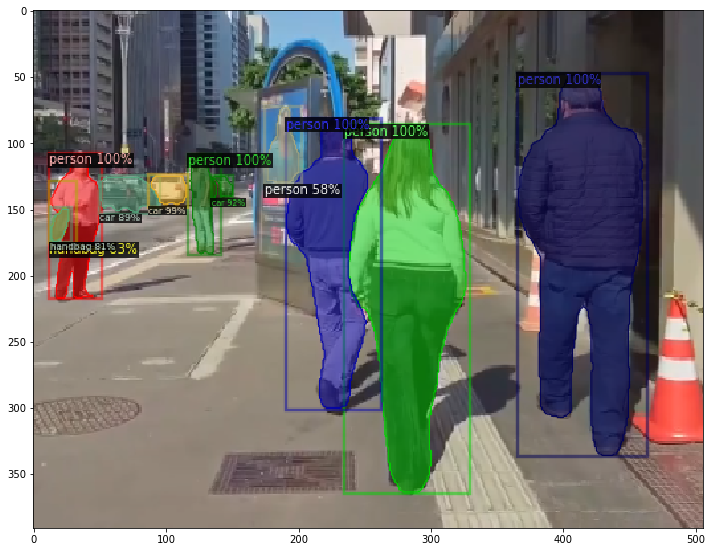

In [39]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2.imshow('imagem ',out.get_image()[:, :, ::-1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize = (12,12))
plt.imshow(out.get_image())

## Aplicação do Algoritmo em Vídeo

In [18]:
import cv2
import numpy as np
from datetime import datetime

counter_global = 0
flag = True
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('./videos/edit.mp4')
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")


while(cap.isOpened()):
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        
        # Instanciando Preditor a partir do shape do frame vídeo
        if flag:
            cfg = get_cfg()
            cfg.MODEL.DEVICE = 'cpu'
            cfg.IMAGE = 0
            cfg.SEGMENTATION = 1
            cfg.IMAGE_BW = 2
            # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
            cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
            # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
            cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
            predictor = DefaultPredictor(cfg)
            flag = False
        
        if( counter_global% 15== 0):
            print('Start:', datetime.now())
            outputs = predictor(frame)
            print('End:', datetime.now())
        # Predição usando modelo pré treinado
        v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        
        # Display the resulting frame
        cv2.imshow('Projeto Integrador 2 - Segmentacao', out.get_image()[:, :, ::-1])
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        counter_global+=1
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
   
    # Break the loop
    else: 
        break
            

# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()

## Obtendo Caminho por Imagens

### Retirando Dados da Região de Segmentação

tensor([ 0,  0,  0,  0,  0,  2,  2,  2, 26, 26,  0])
Boxes(tensor([[304.6222,  40.1722, 386.6615, 280.9142],
        [  9.9539,  90.3469,  42.9587, 181.9429],
        [195.6217,  72.0884, 274.7528, 304.6999],
        [158.8582,  68.3018, 219.5490, 251.4310],
        [ 97.4134,  90.6406, 118.1058, 154.1968],
        [ 72.6743, 103.5145,  97.7883, 124.0068],
        [112.5072, 104.0611, 126.1212, 119.0454],
        [ 41.8538, 104.1066,  80.1266, 128.6901],
        [ 10.6585, 124.3351,  23.9467, 146.3806],
        [ 10.3002, 107.6865,  27.8090, 146.9231],
        [145.9342,  60.7246, 168.7892, 109.5223]]))


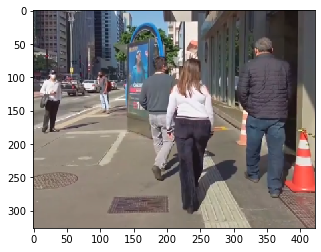

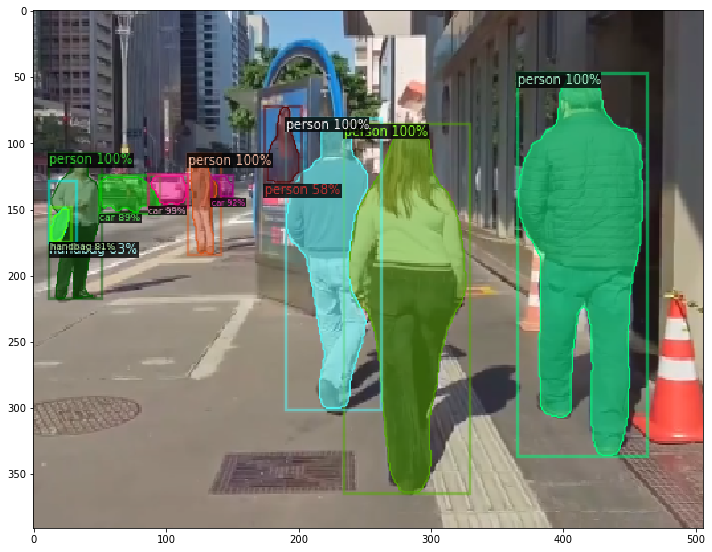

In [40]:
imagem = 'frame_example.png'
im = cv2.imread('./images/' + imagem)
# cv2.imshow('Imagem', im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

cfg = get_cfg()
cfg.MODEL.DEVICE = 'cpu'
cfg.IMAGE = 0
cfg.SEGMENTATION = 1
cfg.IMAGE_BW = 2
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2.imshow('Segmentacao',out.get_image()[:, :, ::-1])
# cv2.waitKey(0)
plt.figure(figsize = (12,12))
plt.imshow(out.get_image())

### Retirando Segmentações da Imagem

In [41]:
import cv2
retangulos = outputs["instances"].pred_boxes

In [42]:
retangulos_pred = []
for points in retangulos:
    aux = list(map(int, points))
    retangulos_pred.append(aux)


In [43]:
retangulos_pred

[[304, 40, 386, 280],
 [9, 90, 42, 181],
 [195, 72, 274, 304],
 [158, 68, 219, 251],
 [97, 90, 118, 154],
 [72, 103, 97, 124],
 [112, 104, 126, 119],
 [41, 104, 80, 128],
 [10, 124, 23, 146],
 [10, 107, 27, 146],
 [145, 60, 168, 109]]

### Removendo Região de Segmentação por blocos RGB(0,0,0)

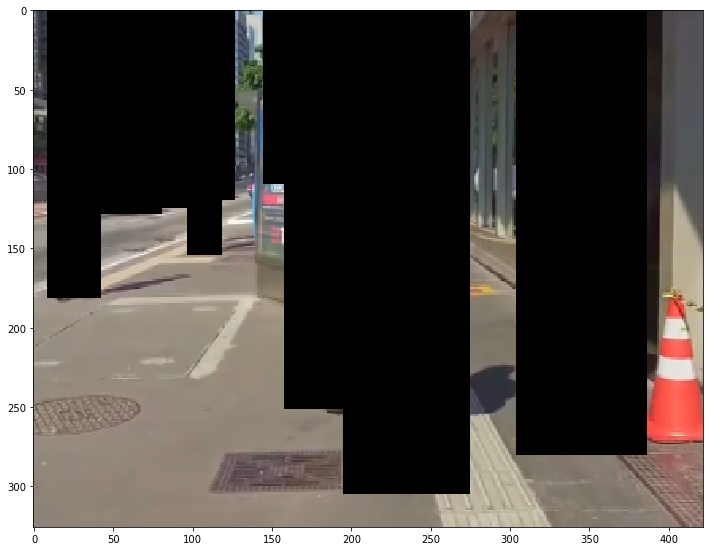

In [44]:
image = cv2.imread("./images/" + imagem)
cont = 1
for pontos in retangulos_pred:
    cont+=1


    start_point = (pontos[0], pontos[1]-1000) # Esticando região do objeto
    end_point = (pontos[2], pontos[3])

    color = (0, 0, 0)
    thickness = -1

    image = cv2.rectangle(image, start_point, end_point, color, thickness)

# Displaying the image
# cv2.imshow('Imagem S/ objetos', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize = (12,12))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

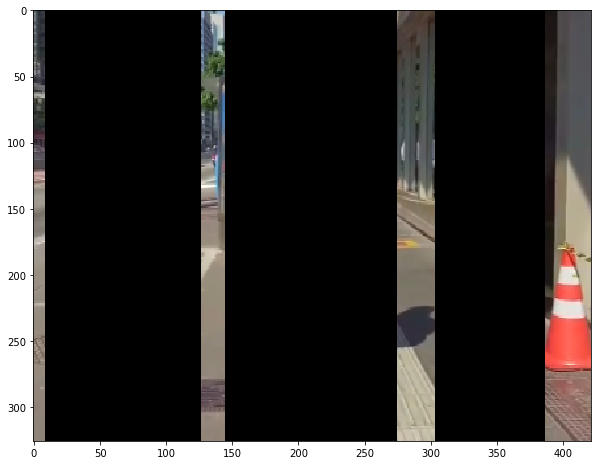

In [45]:
image = cv2.imread("./images/" + imagem)
cont = 1
for pontos in retangulos_pred:
    cont+=1


    start_point = (pontos[0], pontos[1]+1000) # Esticando região do objeto
    end_point = (pontos[2], pontos[3]-1000)

    color = (0, 0, 0)
    thickness = -1

    image = cv2.rectangle(image, start_point, end_point, color, thickness)

# Displaying the image 
# cv2.imshow('Imagem S/ objetos', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Regiões Livres de Objetos

### Pontos sem Objetos

In [46]:
Min = float('inf')
Max = float('-inf')

free_points = []
for pos, im in enumerate(image[0]):
    if list(im) != [0,0,0]:
        Min = min(pos, Min)
        Max = max(pos, Max)
    else:
        if Min != float('inf'): free_points.append([Min, Max])
        Min, Max = float('inf'), float('-inf')

if Min != float('inf'): free_points.append([Min, Max])

In [47]:
free_points

[[0, 8], [127, 144], [275, 303], [387, 421]]

### Gerando Área Retangular de Livre acesso

In [48]:
free_points_rectangular = []
for i in free_points:
    if i[0] != i[1]:
        free_points_rectangular.append(i)

In [49]:
free_points_rectangular

[[0, 8], [127, 144], [275, 303], [387, 421]]

In [50]:
for item in free_points_rectangular:
    item.append(item[0] + len(image))
    item.append(item[0] + len(image) + abs(item[0] - item[1]))

In [51]:
free_points_rectangular

[[0, 8, 326, 334],
 [127, 144, 453, 470],
 [275, 303, 601, 629],
 [387, 421, 713, 747]]

### Demarcação de Áreas Livres dentro das Imagem

In [55]:
import cv2
imagem_name = 'result.png'
for pontos in free_points_rectangular:
    print(pontos)
    overlay = image.copy()
    image = cv2.rectangle(overlay, (pontos[0], 0), (pontos[1], pontos[2]), (0, 255, 0))  # A filled rectangle
#     cv2.imshow('Iamge apontano mais uma area livre de objetos', overlay)    
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
cv2.imwrite(imagem_name, overlay)


[0, 8, 326, 334]
[127, 144, 453, 470]
[275, 303, 601, 629]
[387, 421, 713, 747]


True

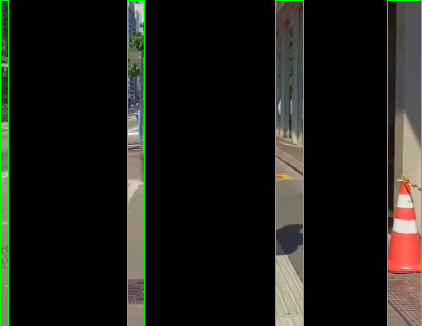

In [56]:
from IPython.display import Image 
display(Image(imagem_name))